Se importan las librerias necesarias para el análisis, junto a esto se realiza la conexión a BigQuery

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

import os
os.environ["GCLOUD_PROJECT"] = "utopian-courier-382221"

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows =10
%matplotlib inline


Se listan las tablas que contiene el dataset 'nhtsa_traffic_fatalities'

In [2]:
import bq_helper

# Helper object
openAQ = bq_helper.BigQueryHelper(active_project='bigquery-public-data',
                                 dataset_name='nhtsa_traffic_fatalities')
# List of table
print('El número de tablas es: ', len(openAQ.list_tables()))
lista_tablas = openAQ.list_tables()
print(lista_tablas)

El número de tablas es:  143
[' accident_2015', ' accident_2016', ' accident_2017', ' accident_2018', ' accident_2019', ' accident_2020', ' cevent_2015', ' cevent_2016', ' cevent_2017', ' cevent_2018', ' cevent_2019', ' cevent_2020', ' damage_2015', ' damage_2016', ' damage_2017', ' damage_2018', ' damage_2019', ' damage_2020', ' distract_2015', ' distract_2016', ' distract_2017', ' distract_2018', ' distract_2019', ' distract_2020', ' drimpair_2015', ' drimpair_2016', ' drimpair_2017', ' drimpair_2018', ' drimpair_2019', ' drimpair_2020', ' factor_2015', ' factor_2016', ' factor_2017', ' factor_2018', ' factor_2019', ' factor_2020', ' maneuver_2015', ' maneuver_2016', ' maneuver_2017', ' maneuver_2018', ' maneuver_2019', ' maneuver_2020', ' nmcrash_2015', ' nmcrash_2016', ' nmcrash_2017', ' nmcrash_2018', ' nmcrash_2019', ' nmcrash_2020', ' nmimpair_2015', ' nmimpair_2016', ' nmimpair_2017', ' nmimpair_2018', ' nmimpair_2019', ' nmimpair_2020', ' nmprior_2015', ' nmprior_2016', ' nmpr

Se exploran todas las tablas que tengan en su nombre el número 2015:

In [3]:
import re
lista_vacia = []
lista_2015 = []
for tabla in lista_tablas:
    x = re.search('2015', tabla)
    
    if x:
        lista_2015.append(x.string)
    else: pass
print(len(lista_2015))

38


In [4]:
lista_2015

[' accident_2015',
 ' cevent_2015',
 ' damage_2015',
 ' distract_2015',
 ' drimpair_2015',
 ' factor_2015',
 ' maneuver_2015',
 ' nmcrash_2015',
 ' nmimpair_2015',
 ' nmprior_2015',
 ' parkwork_2015',
 ' pbtype_2015',
 ' safetyeq_2015',
 ' vevent_2015',
 ' vindecode_2015',
 ' violatn_2015',
 ' vision_2015',
 ' vsoe_2015',
 'accident_2015',
 'cevent_2015',
 'damage_2015',
 'distract_2015',
 'drimpair_2015',
 'factor_2015',
 'maneuver_2015',
 'nmcrash_2015',
 'nmimpair_2015',
 'nmprior_2015',
 'parkwork_2015',
 'pbtype_2015',
 'person_2015',
 'safetyeq_2015',
 'vehicle_2015',
 'vevent_2015',
 'vindecode_2015',
 'violatn_2015',
 'vision_2015',
 'vsoe_2015']

Por instrucción del profesor se decide trabajar con 'accident_2015'

Se realiza una query en BigQuery con todas las columnas de la tabla 'accident_2015' del dataset 'nhtsa_traffic_fatalities' del proyecto 'bigquery-public-data'

In [5]:
query = """ SELECT *
            FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
"""


Se transforma la consulta a un DataFrame

In [6]:
df1 = openAQ.query_to_pandas(query)
df1

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,4,Arizona,40610,4,4,0,0,0,7,7,...,99,0,None,0,None,0,None,1,0,2015-09-20 14:55:00+00:00
32534,18,Indiana,180132,4,4,0,0,0,6,6,...,99,0,None,0,None,0,None,1,0,2015-03-10 22:30:00+00:00
32535,13,Georgia,130196,4,4,0,0,0,8,8,...,99,0,None,0,None,0,None,1,0,2015-03-02 06:17:00+00:00
32536,39,Ohio,390468,4,4,0,0,0,6,6,...,38,0,None,0,None,0,None,1,0,2015-07-13 07:54:00+00:00


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32538 entries, 0 to 32537
Data columns (total 70 columns):
 #   Column                                                       Non-Null Count  Dtype              
---  ------                                                       --------------  -----              
 0   state_number                                                 32538 non-null  Int64              
 1   state_name                                                   32538 non-null  object             
 2   consecutive_number                                           32538 non-null  Int64              
 3   number_of_vehicle_forms_submitted_all                        32538 non-null  Int64              
 4   number_of_motor_vehicles_in_transport_mvit                   32538 non-null  Int64              
 5   number_of_parked_working_vehicles                            32538 non-null  Int64              
 6   number_of_forms_submitted_for_persons_not_in_motor_vehicles  32538 non

Se exploran los datos del DataFrame, desplegando el tipo de dato por columna

Se verifica que cada columna tenga datos del mismo tipo

In [8]:
for col in df1.columns:
    if df1[col].apply(type).nunique() == 0:
        print(f"Los tipos de datos de la columna {col} no son todos del mismo tipo")

Se muestra una descripción estadística de cada columna:

In [9]:
for i in range(7):
    display(df1.iloc[:,   i*10 : i*10 + 10].describe())

,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles
count,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0
mean,27.484049,275542.16347,1.556273,1.520622,0.035651,0.2171,0.22589,2.282562,2.291352
std,16.283983,162763.509273,0.888945,0.85189,0.267064,0.482805,0.509181,1.938906,1.943591
min,1.0,10001.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,12.0,122043.25,1.0,1.0,0.0,0.0,0.0,1.0,1.0
50%,27.0,270272.5,1.0,1.0,0.0,0.0,0.0,2.0,2.0
75%,42.0,420531.75,2.0,2.0,0.0,0.0,0.0,3.0,3.0
max,56.0,560130.0,58.0,58.0,11.0,16.0,16.0,93.0,93.0


,county,city,day_of_crash,month_of_crash,year_of_crash,day_of_week,hour_of_crash,minute_of_crash,national_highway_system,land_use
count,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0
mean,91.316737,1201.200811,15.554767,6.812588,2015.0,4.10185,13.450181,28.956482,0.399103,1.538017
std,94.942054,1886.078795,8.770617,3.357216,0.0,2.093024,10.173214,18.380886,0.717093,0.628475
min,1.0,0.0,1.0,1.0,2015.0,1.0,0.0,0.0,0.0,1.0
25%,31.0,0.0,8.0,4.0,2015.0,2.0,7.0,14.0,0.0,1.0
50%,71.0,0.0,15.0,7.0,2015.0,4.0,14.0,29.0,0.0,2.0
75%,115.0,1960.0,23.0,10.0,2015.0,6.0,19.0,44.0,1.0,2.0
max,999.0,9999.0,31.0,12.0,2015.0,7.0,99.0,99.0,9.0,9.0


,functional_system,ownership,route_signing,milepoint
count,32538.0,32538.0,32538.0,32538.0
mean,4.680865,25.310406,3.612238,13837.88183
std,8.545826,40.832943,1.836584,34233.465284
min,1.0,1.0,1.0,0.0
25%,3.0,1.0,2.0,0.0
50%,4.0,2.0,3.0,50.0
75%,5.0,25.0,5.0,343.0
max,99.0,99.0,9.0,99999.0


,latitude,longitude,special_jurisdiction,first_harmful_event,manner_of_collision,relation_to_junction_specific_location
count,32538.000000,32538.000000,32538.0,32538.0,32538.0,32538.0
mean,36.864246,-87.588658,0.034022,18.096042,1.809085,2.188856
std,6.584792,72.244471,0.381574,14.073517,5.315107,5.085441
min,19.273050,-166.549556,0.0,1.0,0.0,1.0
25%,33.132206,-98.078382,0.0,8.0,0.0,1.0
50%,36.369224,-87.760242,0.0,12.0,0.0,1.0
75%,40.608136,-81.353815,0.0,30.0,2.0,2.0
max,99.999900,999.999900,9.0,99.0,99.0,99.0


,relation_to_trafficway,light_condition,atmospheric_conditions_1,atmospheric_conditions_2
count,32538.0,32538.0,32538.0,32538.0
mean,2.375254,1.888991,3.492901,0.283545
std,4.437614,1.141131,9.814978,1.645617
min,1.0,1.0,1.0,0.0
25%,1.0,1.0,1.0,0.0
50%,1.0,2.0,1.0,0.0
75%,4.0,2.0,2.0,0.0
max,99.0,9.0,99.0,12.0


,atmospheric_conditions,hour_of_notification,minute_of_notification,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital
count,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0
mean,3.644877,55.336253,63.545301,57.186582,65.025877,71.03688
std,9.84363,43.073511,36.687537,43.02083,36.563776,36.909266
min,1.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,14.0,29.0,14.0,30.0,21.0
50%,1.0,23.0,59.0,88.0,88.0,88.0
75%,2.0,99.0,99.0,99.0,99.0,99.0
max,99.0,99.0,99.0,99.0,99.0,99.0


,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers
count,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0
mean,75.622872,1.233481,0.219005,0.124839,1.09054,0.291321
std,30.99221,5.613701,3.680911,3.409601,0.364769,0.472028
min,0.0,0.0,0.0,0.0,1.0,0.0
25%,52.0,0.0,0.0,0.0,1.0,0.0
50%,88.0,0.0,0.0,0.0,1.0,0.0
75%,99.0,0.0,0.0,0.0,1.0,1.0
max,99.0,99.0,99.0,99.0,10.0,3.0


Se trata de entender a qué corresponde la columna 'state_number', se infiere que es un número identificador para cada estado

In [10]:
df1['state_number'][0:7]

0    30
1    39
2    49
3    48
4    41
5    39
6    39
Name: state_number, dtype: Int64

In [11]:
df1[ df1['state_number'] == 39]

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
5,39,Ohio,390088,8,8,0,0,0,13,13,...,11,0,None,0,None,0,None,1,0,2015-02-14 11:30:00+00:00
6,39,Ohio,390096,31,31,0,0,0,49,49,...,47,0,None,0,None,0,None,1,0,2015-02-14 14:20:00+00:00
8,39,Ohio,390126,29,29,0,0,0,50,50,...,43,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-02-14 14:22:00+00:00
101,39,Ohio,390122,5,5,0,1,1,7,7,...,88,0,None,0,None,0,None,1,0,2015-03-06 21:34:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,39,Ohio,390440,4,4,0,0,0,4,4,...,14,0,None,0,None,0,None,1,2,2015-07-01 20:49:00+00:00
32508,39,Ohio,390456,4,4,0,0,0,4,4,...,40,0,None,0,None,0,None,1,1,2015-07-14 18:03:00+00:00
32514,39,Ohio,390910,4,4,0,0,0,7,7,...,43,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-11-11 19:42:00+00:00
32521,39,Ohio,390407,4,4,0,0,0,6,6,...,52,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-06-28 18:35:00+00:00


Además, se trata de entender la columna consecutive_number, se infiere que es un número que cuenta los accidentes por estado, ya que si se ordenan las columnas por estos valores se obtiene un número que comienza por el número del estado de cada estado y va aumentando de 1 en 1.

Por ejemplo, el 'consecutive_number' del estado de Ohio debe partir con el número 39 y los siguientes digitos corresponderán al número de accidentes

In [12]:
df1[ df1['state_name'] == 'Ohio'].sort_values(['consecutive_number'])

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
24134,39,Ohio,390001,2,2,0,0,0,2,2,...,55,0,None,0,None,0,None,1,1,2015-01-05 06:55:00+00:00
4037,39,Ohio,390002,2,1,1,0,0,2,2,...,36,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,2,1,2015-01-01 15:04:00+00:00
422,39,Ohio,390003,3,1,2,1,1,1,1,...,88,19,Recent Previous Crash Scene Nearby (Since 1989),0,None,0,None,1,0,2015-01-03 07:30:00+00:00
29704,39,Ohio,390004,2,2,0,0,0,2,2,...,88,0,None,0,None,0,None,1,0,2015-01-14 07:00:00+00:00
29743,39,Ohio,390005,2,2,0,0,0,3,3,...,20,0,None,0,None,0,None,1,1,2015-01-04 19:56:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27798,39,Ohio,391071,2,2,0,1,1,2,2,...,8,16,Non-Occupant Struck Vehicle (Since 1983),14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,1,0,2015-12-22 15:35:00+00:00
26534,39,Ohio,391072,2,2,0,0,0,2,2,...,52,0,None,0,None,0,None,1,0,2015-12-22 21:25:00+00:00
24112,39,Ohio,391073,2,2,0,0,0,3,3,...,3,19,Recent Previous Crash Scene Nearby (Since 1989),0,None,0,None,1,1,2015-07-14 22:17:00+00:00
18053,39,Ohio,391074,1,1,0,0,0,2,2,...,99,0,None,0,None,0,None,1,0,2015-09-30 13:10:00+00:00


In [13]:
df1.sort_values('consecutive_number')

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
11882,1,Alabama,10001,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-01-01 02:40:00+00:00
16228,1,Alabama,10002,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2015-01-01 22:13:00+00:00
11568,1,Alabama,10003,1,1,0,0,0,2,2,...,99,0,None,0,None,0,None,1,1,2015-01-01 01:25:00+00:00
16680,1,Alabama,10004,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-01-04 00:57:00+00:00
26314,1,Alabama,10005,2,2,0,0,0,2,2,...,88,0,None,0,None,0,None,1,0,2015-01-07 07:09:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25783,56,Wyoming,560126,2,2,0,0,0,2,2,...,88,0,None,0,None,0,None,2,0,2015-12-09 06:29:00+00:00
12917,56,Wyoming,560127,1,1,0,0,0,3,3,...,36,0,None,0,None,0,None,1,1,2015-12-10 22:20:00+00:00
26390,56,Wyoming,560128,2,2,0,0,0,2,2,...,32,0,None,0,None,0,None,1,0,2015-12-13 11:50:00+00:00
20186,56,Wyoming,560129,2,2,0,0,0,4,4,...,18,0,None,0,None,0,None,1,0,2015-12-14 23:05:00+00:00


In [14]:
df1.sort_values('consecutive_number')[780:790]

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
9552,1,Alabama,10782,1,1,0,0,0,2,2,...,58,0,None,0,None,0,None,1,0,2015-12-19 07:30:00+00:00
13101,1,Alabama,10783,1,1,0,1,1,1,1,...,88,0,None,0,None,0,None,1,0,2015-12-19 18:30:00+00:00
1287,1,Alabama,10784,1,1,0,0,0,5,5,...,88,0,None,0,None,0,None,3,1,2015-12-25 02:00:00+00:00
1262,1,Alabama,10785,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-10-03 02:19:00+00:00
12997,2,Alaska,20001,1,1,0,0,0,1,1,...,18,0,None,0,None,0,None,1,1,2015-02-05 00:22:00+00:00
14558,2,Alaska,20002,1,1,0,1,1,2,2,...,17,0,None,0,None,0,None,1,0,2015-01-09 20:01:00+00:00
3603,2,Alaska,20003,1,1,0,0,0,2,2,...,88,0,None,0,None,0,None,1,0,2015-01-21 02:22:00+00:00
6012,2,Alaska,20004,1,1,0,0,0,2,2,...,14,0,None,0,None,0,None,1,1,2015-02-07 00:33:00+00:00
16516,2,Alaska,20005,1,1,0,1,1,5,5,...,88,0,None,0,None,0,None,1,0,2015-03-04 13:34:00+00:00
30838,2,Alaska,20006,3,3,0,0,0,6,6,...,41,0,None,0,None,0,None,1,0,2015-03-12 18:06:00+00:00


In [15]:
df1.sort_values('consecutive_number')[32000:32010]

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
16470,55,Wisconsin,550117,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2015-04-20 17:18:00+00:00
7652,55,Wisconsin,550118,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-04-18 18:50:00+00:00
17437,55,Wisconsin,550119,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-04-21 23:00:00+00:00
25430,55,Wisconsin,550120,2,2,0,0,0,10,10,...,5,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-04-17 04:38:00+00:00
28549,55,Wisconsin,550121,2,2,0,0,0,5,5,...,99,0,None,0,None,0,None,1,0,2015-04-22 11:07:00+00:00
10527,55,Wisconsin,550122,1,1,0,1,1,3,3,...,88,0,None,0,None,0,None,1,1,2015-04-23 02:32:00+00:00
23189,55,Wisconsin,550123,2,2,0,0,0,2,2,...,99,0,None,0,None,0,None,1,0,2015-04-28 11:32:00+00:00
7620,55,Wisconsin,550124,1,1,0,0,0,1,1,...,45,0,None,0,None,0,None,1,0,2015-04-29 14:21:00+00:00
27100,55,Wisconsin,550125,2,2,0,0,0,2,2,...,29,3,Other Maintenance or Construction-Created Cond...,0,None,0,None,2,0,2015-04-27 13:49:00+00:00
22486,55,Wisconsin,550126,2,2,0,0,0,2,2,...,88,0,None,0,None,0,None,1,0,2015-04-28 06:24:00+00:00


### Pregunta 2.1: Mayor numero de accidentes por estado

Se crea una lista con todos sus valores igual a 1, con el mismo largo de las columnas del DataFrame, esto se utilizará para contar el número de accidentes por estado.

In [16]:
df1['contador'] = [1 for x in range(32538)]

Se agrupa el DataFrame por el valor de 'state_number', y se suman las columnas, de este modo al ver la columna contador, se sabrá cuántos accidentes hubieron por cada estado, con esto, se podrá saber el estado con mayor número de accidentes.

In [17]:
df1.groupby(['state_name']).sum()[0:40]

,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
state_name,,,,,,,,,,,,,,,,,,,,,
Alabama,784,8148405,1202,1184,18,123,133,1748,1758,58396,...,14091,25669,66630,67664,842,94,50,850,221,784
Alaska,120,1201830,88,88,0,13,13,145,145,5407,...,2004,2779,3058,3610,91,14,0,65,24,60
Arizona,3244,32783422,1282,1246,36,203,209,1977,1983,13163,...,23565,34519,43341,50151,991,67,28,897,242,811
Arkansas,2455,24674763,776,759,17,54,57,1115,1118,36983,...,12542,19524,46893,46893,596,224,198,550,142,491
California,18738,192271214,4912,4718,194,1058,1091,7055,7088,178357,...,307497,307831,295648,295695,5777,605,198,3387,1005,3123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ohio,40131,401864725,1691,1639,52,170,184,2327,2341,86579,...,21980,37962,41868,52653,962,70,0,1110,332,1029
Oklahoma,23600,236175820,907,893,14,87,92,1396,1401,53006,...,14572,23716,26035,31341,760,119,27,645,163,590
Oregon,16851,168595210,611,599,12,86,87,918,919,15429,...,11121,16381,28816,31176,323,0,0,446,156,411


In [18]:
df_numero_accidentes = df1.groupby(['state_name'], as_index=False).sum().sort_values(['contador'])

In [19]:
df_numero_accidentes

,state_name,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
8,District of Columbia,253,2530276,32,30,2,18,18,45,45,...,596,876,829,1101,23,0,0,23,5,23
39,Rhode Island,1804,18040891,58,58,0,9,9,101,101,...,522,1187,1121,1819,21,0,0,45,18,41
45,Vermont,2500,25001275,72,70,2,9,9,104,104,...,962,1465,2308,2659,83,0,0,57,14,50
1,Alaska,120,1201830,88,88,0,13,13,145,145,...,2004,2779,3058,3610,91,14,0,65,24,60
11,Hawaii,1275,12753761,132,124,8,31,33,193,195,...,1172,2916,2982,3984,155,14,0,93,27,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,North Carolina,47175,472569583,1979,1949,30,225,226,2895,2896,...,31771,48898,68993,78999,1057,99,0,1379,399,1275
10,Georgia,17277,173659745,2072,2049,23,233,240,3057,3064,...,65207,77286,73511,83251,1072,85,0,1432,304,1329
9,Florida,32388,327694778,4238,4164,74,860,872,6191,6203,...,261531,262700,257393,257395,1843,92,0,2938,644,2699
4,California,18738,192271214,4912,4718,194,1058,1091,7055,7088,...,307497,307831,295648,295695,5777,605,198,3387,1005,3123


Se puede notar que el mayor número de accidentes se produjeron en el estado de Texas con 3190 accidentes.
Lo que puede notarse mejor en un gráfico de barras:

Text(0.5, 1.0, 'Número de accidentes por estado')

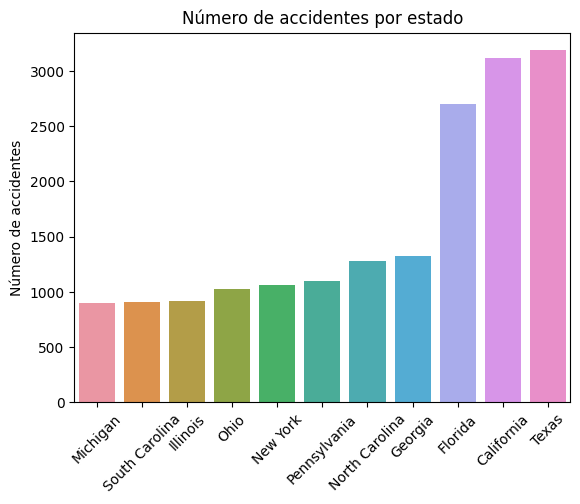

In [20]:
sns.barplot(data = df_numero_accidentes[40:], x = 'state_name', y = 'contador')
plt.ylabel('Número de accidentes')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('Número de accidentes por estado')

### Pregunta 2.2: Mayor número de accidentes por uso de tierra

In [21]:
df1.loc[:, ['state_name', 'land_use','land_use_name'] ]

,state_name,land_use,land_use_name
0,Montana,1,Rural
1,Ohio,1,Rural
2,Utah,1,Rural
3,Texas,1,Rural
4,Oregon,1,Rural
...,...,...,...
32533,Arizona,2,Urban
32534,Indiana,1,Rural
32535,Georgia,2,Urban
32536,Ohio,1,Rural


In [22]:
print(df1['land_use'].max())
print(df1['land_use'].min())

9
1


In [23]:
df1[ df1['land_use'] == 2]['land_use_name']

7        Urban
8        Urban
9        Urban
16       Urban
19       Urban
         ...  
32529    Urban
32531    Urban
32532    Urban
32533    Urban
32535    Urban
Name: land_use_name, Length: 16494, dtype: object

In [24]:
df1[ df1['land_use'] == 9]['land_use_name']

429      Unknown
668      Unknown
860      Unknown
1895     Unknown
2031     Unknown
          ...   
21073    Unknown
24981    Unknown
27909    Unknown
29573    Unknown
31346    Unknown
Name: land_use_name, Length: 24, dtype: object

In [25]:
df1[ df1['land_use'] == 8]['land_use_name']

857      Not Reported
1432     Not Reported
6536     Not Reported
6537     Not Reported
6538     Not Reported
6539     Not Reported
6540     Not Reported
6546     Not Reported
6551     Not Reported
21984    Not Reported
Name: land_use_name, dtype: object

In [26]:
df1.groupby(['land_use_name']).sum().sort_values(['contador'])

,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
land_use_name,,,,,,,,,,,,,,,,,,,,,
Not Reported,303,3037221,11,11,0,3,3,13,13,1555,...,807,842,885,877,0,0,0,11,4,10
Unknown,732,7337186,34,33,1,2,2,53,53,4647,...,1432,1665,1742,1870,99,99,99,27,4,24
Trafficway Not in State Inventory,2790,28098039,237,222,15,45,45,331,331,12419,...,11519,12143,12782,13028,213,23,0,158,40,150
Rural,455304,4562654059,24045,23757,288,1673,1781,36538,36646,1477424,...,841163,976620,1132929,1202619,16445,2363,1035,17715,4854,15860
Urban,435147,4364464410,26311,25455,856,5341,5519,37335,37513,1475219,...,1005816,1124542,1163060,1242223,23378,4641,2928,17573,4577,16494


In [27]:
df1.groupby(['land_use']).sum().sort_values(['contador'])

,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
land_use,,,,,,,,,,,,,,,,,,,,,
8,303,3037221,11,11,0,3,3,13,13,1555,...,807,842,885,877,0,0,0,11,4,10
9,732,7337186,34,33,1,2,2,53,53,4647,...,1432,1665,1742,1870,99,99,99,27,4,24
6,2790,28098039,237,222,15,45,45,331,331,12419,...,11519,12143,12782,13028,213,23,0,158,40,150
1,455304,4562654059,24045,23757,288,1673,1781,36538,36646,1477424,...,841163,976620,1132929,1202619,16445,2363,1035,17715,4854,15860
2,435147,4364464410,26311,25455,856,5341,5519,37335,37513,1475219,...,1005816,1124542,1163060,1242223,23378,4641,2928,17573,4577,16494


In [28]:
df_uso_tierra = df1.groupby(['land_use_name'], as_index=False).sum().sort_values(['contador'])

Text(0.5, 1.0, 'Número de accidentes por uso de tierra')

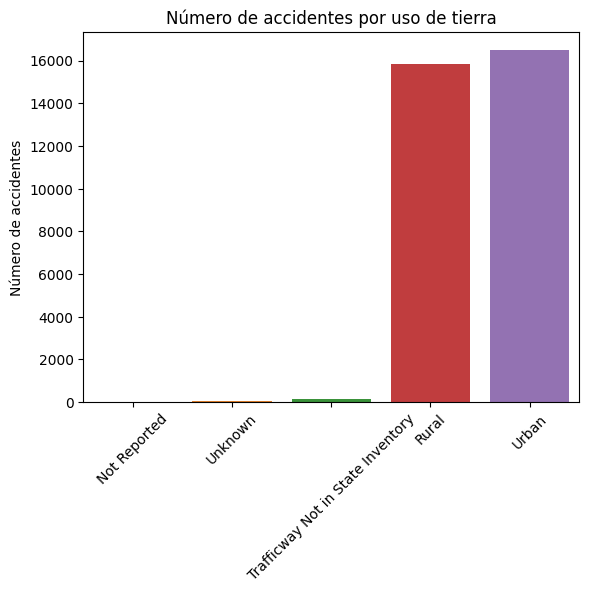

In [29]:
sns.barplot(data = df_uso_tierra, x = 'land_use_name', y = 'contador')
plt.ylabel('Número de accidentes')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('Número de accidentes por uso de tierra')

Como los accidentes urbanos y rurales destacan en gran proporción sobre el resto, conviene crear un gráfico utiilizando solamente con los datos de los accidentes urbanos y rurales.

Text(0.5, 1.0, 'Número de accidentes por uso de tierra')

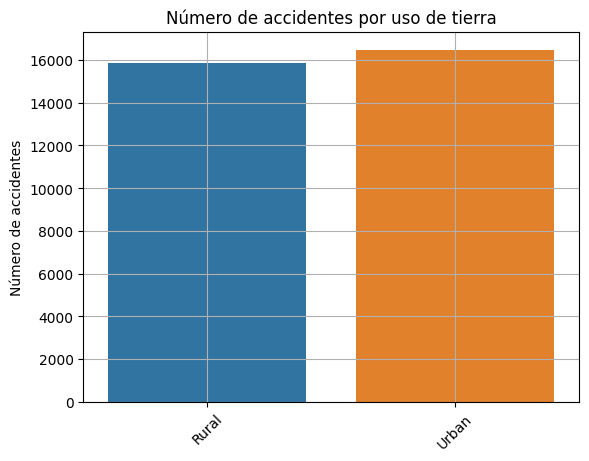

In [30]:
sns.barplot(data = df_uso_tierra[3:], x = 'land_use_name', y = 'contador')
plt.ylabel('Número de accidentes')
plt.xlabel('')
plt.xticks(rotation=45)
plt.grid()
plt.title('Número de accidentes por uso de tierra')

In [31]:
16494*100/15860

103.99747793190416

Se puede notar que los accidentes urbanos son los que ocurren con más frecuencia, aunque no por mucho, es aproximadamente un 4% mayor que los accidentes rurales.

### Pregunta 2.3: Mayor numero de accidentes por empresa de carreteras

In [32]:
df_empresa_carretera = df1.groupby(['ownership_name'], as_index=False).sum().sort_values(['contador'])

In [33]:
df_empresa_carretera

,ownership_name,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
0,Bureau of Fish and Wildlife,30,300149,1,1,0,0,0,1,1,...,12,57,88,88,0,0,0,1,0,1
6,"Local Park, Forest or Reservation Agency",16,160157,1,1,0,0,0,2,2,...,17,54,99,99,0,0,0,1,1,1
8,Navy/Marines,53,530052,1,1,0,0,0,1,1,...,8,4,88,88,0,0,0,1,0,1
12,"Other Public Instrumentality [i.e., Airport]",28,280791,2,2,0,1,1,1,1,...,17,112,104,100,24,0,0,2,1,2
2,Bureau of Land Management,147,1470673,5,4,1,1,1,3,3,...,53,117,352,352,0,0,0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Unknown,42574,426427715,1739,1712,27,201,203,2518,2520,...,34417,48424,64842,73147,900,176,99,1225,349,1139
4,County Highway Agency,89715,898463713,4374,4320,54,429,442,6541,6554,...,162058,193813,226453,242673,2184,336,198,3539,1253,3295
3,City or Municipal Highway Agency,86262,864313867,5035,4800,235,1296,1323,7001,7028,...,187364,215725,227904,246142,3414,723,614,3553,954,3390
9,Not Reported,174396,1752459290,9847,9587,260,1689,1734,14439,14484,...,471462,500993,505796,524807,9831,832,326,6982,1925,6388


Text(0.5, 1.0, 'Número de accidentes por empresa de carretera')

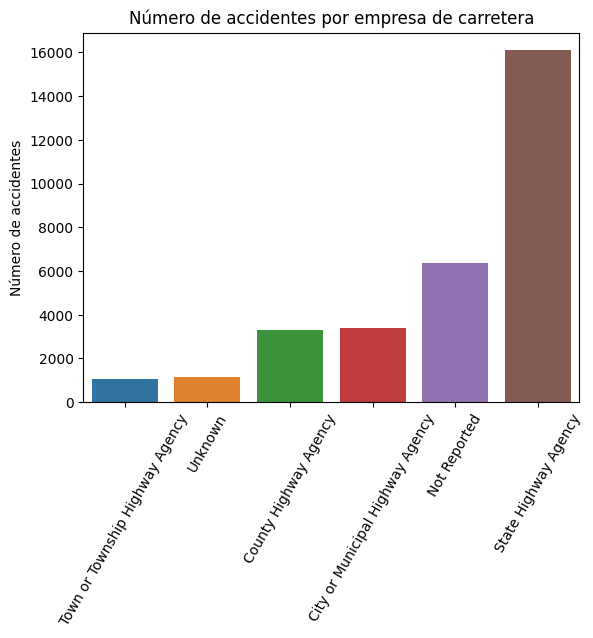

In [34]:
sns.barplot(data = df_empresa_carretera[16:], x = 'ownership_name', y = 'contador')
plt.ylabel('Número de accidentes')
plt.xlabel('')
plt.xticks(rotation=60)
plt.title('Número de accidentes por empresa de carretera')

Se puede notar que la empresa de carreteras con mayor número de accidentes es la empresa 'State Highway Agency', la cual supera por mucho a las otras empresas de carreteras, lo que podría indicar que hay un problema con esa empresa, sin embargo habría que revisar además el largo de las carreteras de cada empresa, puede ser que State Highway Agency tenga la mayor parte de las carreteras de Estados Unidos por lo que por proporicones debería ser la que tenga el mayor número de accidentes.

También se puede destacar que hay un número importante de accidentes en los cuales no se reporta o es desconocida la carretera donde fue el accidente.

### Pregunta 2.4: Mayor numero de accidentes por carretera

In [35]:
df1['trafficway_identifier']

0                         I-90 W
1                           I-80
2                           I-80
3                           I-40
4                           I-84
                  ...           
32533                 TATUM BLVD
32534                     I-65 N
32535                     SR-139
32536                       US-6
32537    SR-309 APPALACHIAN PKWY
Name: trafficway_identifier, Length: 32538, dtype: object

In [36]:
df1['trafficway_identifier_2']

0                 
1                 
2                 
3                 
4                 
           ...    
32533    MAYO BLVD
32534             
32535             
32536             
32537             
Name: trafficway_identifier_2, Length: 32538, dtype: object

In [37]:
df_carretera = df1.groupby(['trafficway_identifier'], as_index=False).sum().sort_values(['contador'])

In [38]:
df_carretera

,trafficway_identifier,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
0,1-69/US-59 SOUTHWEST FWY,48,483006,1,1,0,0,0,2,2,...,21,8,21,18,0,0,0,1,0,1
9584,RIVER BOTTOMS RD,49,490203,2,2,0,0,0,4,4,...,20,2,88,88,0,0,0,1,0,1
9585,RIVER PARK DR,17,170911,1,1,0,0,0,6,6,...,99,99,99,99,0,0,0,1,1,1
9587,RIVER RD.,37,371049,1,1,0,1,1,2,2,...,3,12,88,88,0,0,0,1,1,1
9591,RIVERDALE AVE,36,360178,1,1,0,1,1,1,1,...,99,99,99,99,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,I-40,5104,51118690,258,254,4,22,28,439,445,...,8271,10123,11480,12349,528,195,126,186,26,159
13948,US-1,4264,42822039,305,297,8,75,75,442,442,...,15229,15757,15494,16125,63,0,0,205,41,190
7513,I-75,3968,39855118,360,348,12,29,39,593,603,...,14324,15336,16260,16799,462,50,0,218,46,204
7642,I-95,5109,51242436,392,381,11,22,26,658,662,...,14728,15850,16272,16893,418,48,0,253,60,213


Text(0.5, 1.0, 'Número de accidentes por carretera')

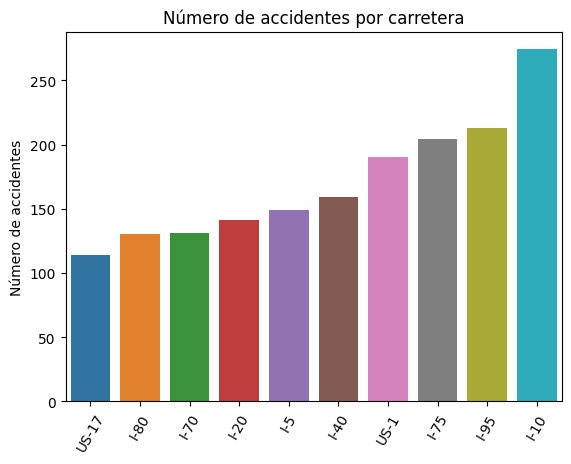

In [39]:
sns.barplot(data = df_carretera[15668:], x = 'trafficway_identifier', y = 'contador')
plt.ylabel('Número de accidentes')
plt.xlabel('')
plt.xticks(rotation=60)
plt.title('Número de accidentes por carretera')

Se logra identificar que la carretera con mayor número de accidentes es la carretera 'I-10'.

### Pregunta 3

In [40]:
df_meses = df1.groupby(['month_of_crash'],group_keys=True, as_index=False).apply(lambda x: x)
df_meses

state_number      state_name  consecutive_number  \
0  7                42    Pennsylvania              420702   
   21               42    Pennsylvania              420704   
   23               26        Michigan              260911   
   74                6      California               60020   
   77               42    Pennsylvania              420363   
...                ...             ...                 ...   
11 32493            48           Texas              482885   
   32498            37  North Carolina              371229   
   32518            51        Virginia              510689   
   32522            29        Missouri              290819   
   32524             6      California               62748   

          number_of_vehicle_forms_submitted_all  \
0  7                                          9   
   21                                        22   
   23                                        58   
   74                                         5   
   77                                         6   
...                                         ...   
11 32493                                      4   
   32498                                      4   
   32518                                      4   
   32522                                      4   
   32524                                      5   

          number_of_motor_vehicles_in_transport_mvit  \
0  7                                               9   
   21                                             18   
   23                                             58   
   74                                              5   
   77                                              6   
...                                              ...   
11 32493                                           4   
   32498                                           4   
   32518                                           4   
   32522                                           4   
   32524                                           4   

          number_of_parked_working_vehicles  \
0  7                                      0   
   21                                     4   
   23                                     0   
   74                                     0   
   77                                     0   
...                                     ...   
11 32493                                  0   
   32498                                  0   
   32518                                  0   
   32522                                  0   
   32524                                  1   

          number_of_forms_submitted_for_persons_not_in_motor_vehicles  \
0  7                                                      0             
   21                                                     4             
   23                                                     0             
   74                                                     0             
   77                                                     0             
...                                                     ...             
11 32493                                                  0             
   32498                                                  0             
   32518                                                  0             
   32522                                                  1             
   32524                                                  0             

          number_of_persons_not_in_motor_vehicles_in_transport_mvit  \
0  7                                                      0           
   21                                                     4           
   23                                                     0           
   74                                                     0           
   77                                                     0           
...                                                     ...           
11 32493                                

In [41]:
df33 = df_meses[ df_meses['month_of_crash'] == 12]
df34 = df33.groupby(['state_name'],group_keys=True, as_index=False).apply(lambda x: x)
df33

state_number      state_name  consecutive_number  \
11 18               53      Washington              530505   
   24               35      New Mexico              350271   
   45               35      New Mexico              350272   
   61               49            Utah              490250   
   70               12         Florida              122470   
...                ...             ...                 ...   
   32493            48           Texas              482885   
   32498            37  North Carolina              371229   
   32518            51        Virginia              510689   
   32522            29        Missouri              290819   
   32524             6      California               62748   

          number_of_vehicle_forms_submitted_all  \
11 18                                         5   
   24                                         5   
   45                                         5   
   61                                         5   
   70                                         5   
...                                         ...   
   32493                                      4   
   32498                                      4   
   32518                                      4   
   32522                                      4   
   32524                                      5   

          number_of_motor_vehicles_in_transport_mvit  \
11 18                                              5   
   24                                              5   
   45                                              5   
   61                                              5   
   70                                              5   
...                                              ...   
   32493                                           4   
   32498                                           4   
   32518                                           4   
   32522                                           4   
   32524                                           4   

          number_of_parked_working_vehicles  \
11 18                                     0   
   24                                     0   
   45                                     0   
   61                                     0   
   70                                     0   
...                                     ...   
   32493                                  0   
   32498                                  0   
   32518                                  0   
   32522                                  0   
   32524                                  1   

          number_of_forms_submitted_for_persons_not_in_motor_vehicles  \
11 18                                                     0             
   24                                                     0             
   45                                                     0             
   61                                                     0             
   70                                                     0             
...                                                     ...             
   32493                                                  0             
   32498                                                  0             
   32518                                                  0             
   32522                                                  1             
   32524                                                  0             

          number_of_persons_not_in_motor_vehicles_in_transport_mvit  \
11 18                                                     0           
   24                                                     0           
   45                                                     0           
   61                                                     0           
   70                                                     0           
...                                                     ...           
   32493                                

In [42]:
lista_df_por_meses = []
for i in range(12):
    dfmes = df_meses[ df_meses['month_of_crash'] == i+1]
    lista_df_por_meses.append(dfmes)

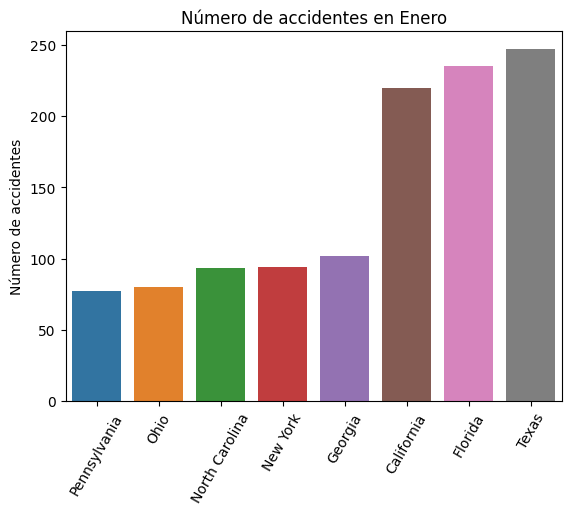

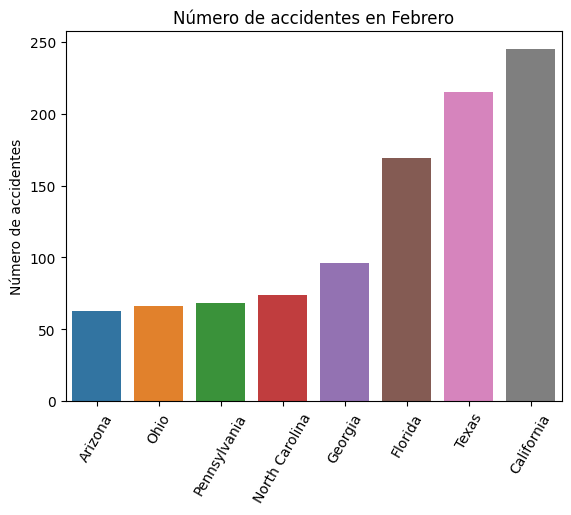

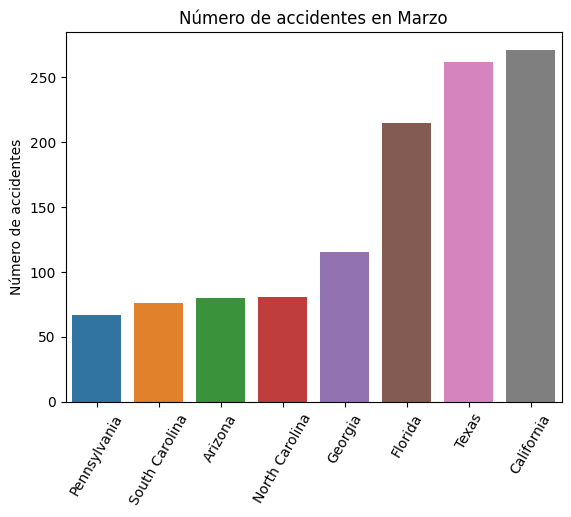

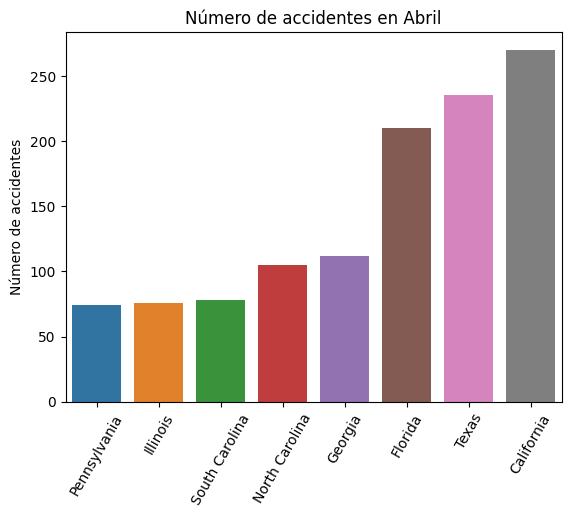

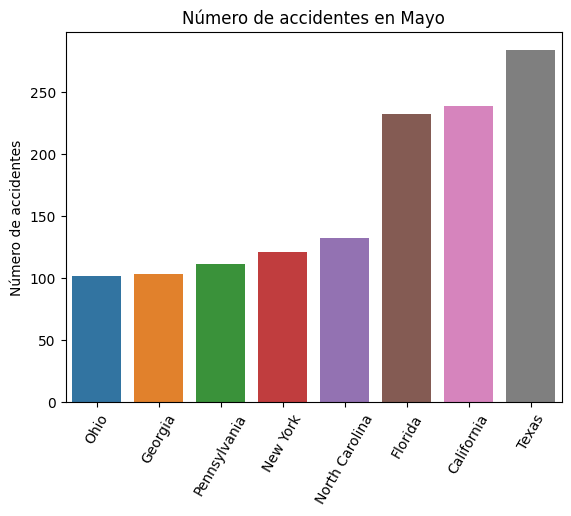

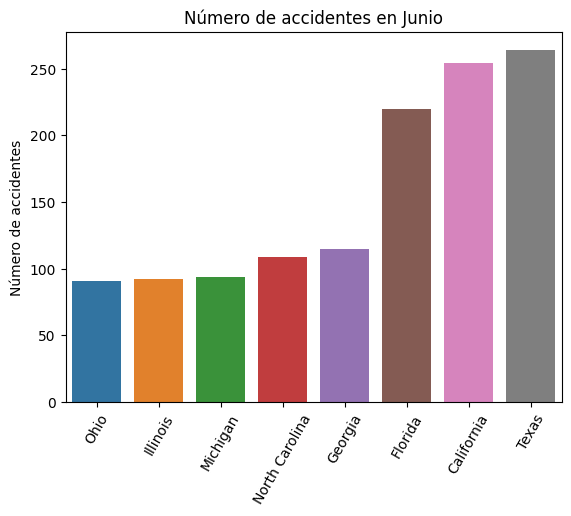

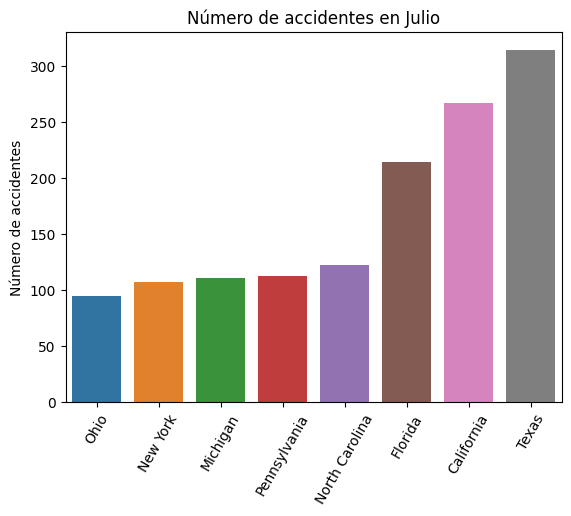

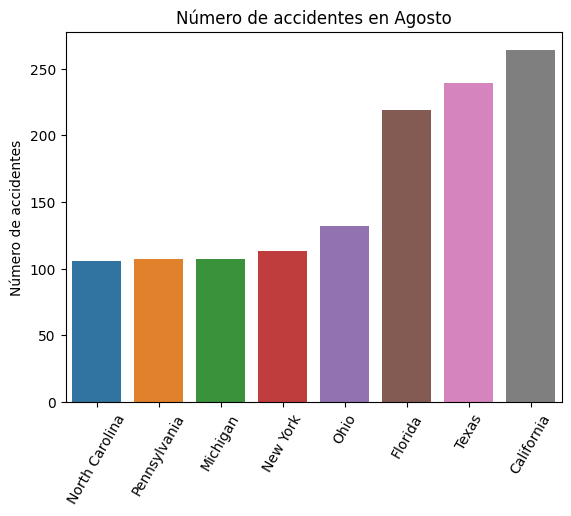

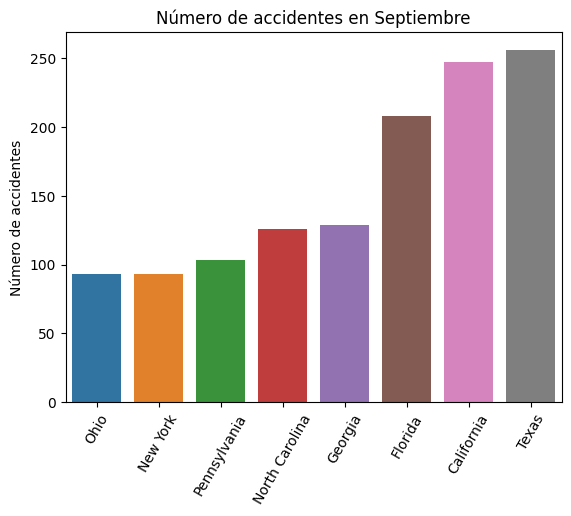

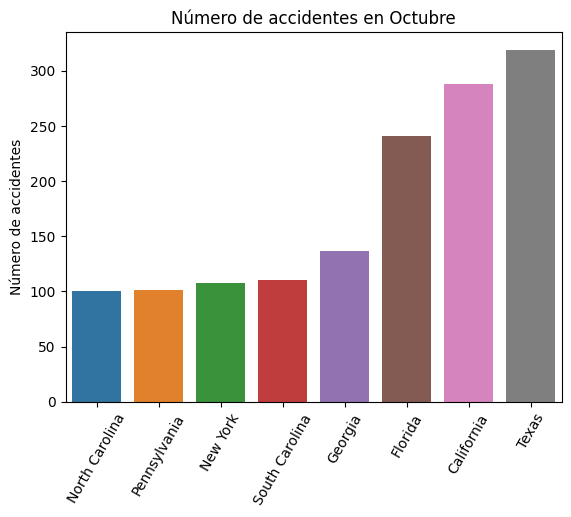

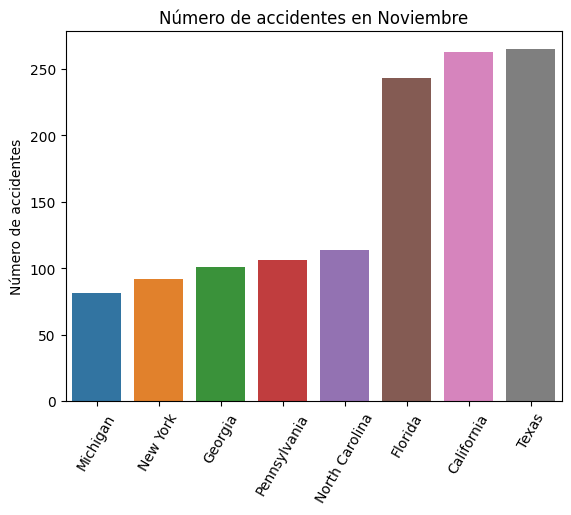

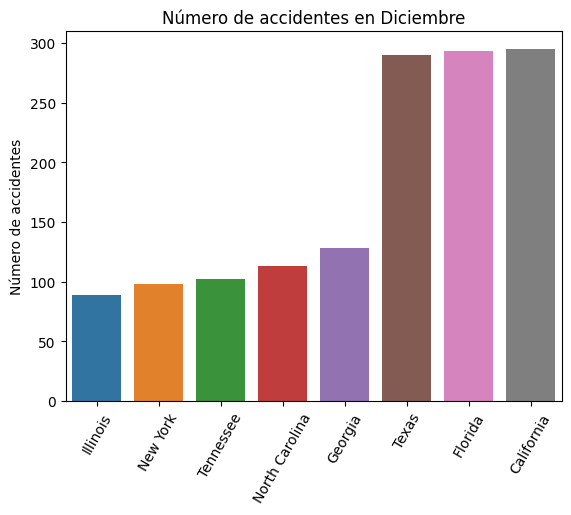

In [43]:
nombre_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
j = 0
for dataf in lista_df_por_meses:
    df_mes = dataf.groupby(['state_name'], as_index=False).sum().sort_values(['contador'])
    sns.barplot(data = df_mes[-8:], x = 'state_name', y = 'contador')
    plt.ylabel('Número de accidentes')
    plt.xlabel('')
    plt.xticks(rotation=60)
    plt.title(f'Número de accidentes en {nombre_meses[j]}')
    j += 1
    plt.show()



También es útil utilizar un gráfico de líneas para poder visualizar cómo va cambiando cada estado al pasar los meses

In [93]:
df1['month_of_crash'].describe()


count     32538.0
mean     6.812588
std      3.357216
min           1.0
25%           4.0
50%           7.0
75%          10.0
max          12.0
Name: month_of_crash, dtype: Float64

In [138]:
estados_interes = ['Florida', 'Texas', 'Georgia', 'North Carolina', 'Pennsylvania', 'Tennessee', 'New York', 'Ohio', 'California']

In [159]:
df2 = df1.groupby(['state_name', 'month_of_crash']).size().reset_index(name = 'contador')
df_pivot = df2.pivot(index='month_of_crash', columns='state_name', values='contador')
df_pivot

state_name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
month_of_crash,,,,,,,,,,,,,,,,,,,,,
1,50.0,2.0,65.0,29.0,220.0,42.0,15.0,9.0,1.0,235.0,...,7.0,63.0,247.0,14.0,3.0,39.0,38.0,17.0,33.0,9.0
2,37.0,2.0,63.0,41.0,245.0,32.0,17.0,7.0,1.0,169.0,...,3.0,49.0,215.0,15.0,NaN,52.0,26.0,14.0,22.0,4.0
3,59.0,4.0,80.0,40.0,271.0,35.0,15.0,8.0,1.0,215.0,...,8.0,65.0,262.0,22.0,NaN,49.0,40.0,19.0,38.0,7.0
4,69.0,7.0,57.0,32.0,270.0,47.0,19.0,3.0,2.0,210.0,...,7.0,63.0,235.0,16.0,3.0,55.0,26.0,24.0,46.0,13.0
5,72.0,7.0,77.0,36.0,239.0,39.0,28.0,10.0,NaN,232.0,...,9.0,80.0,284.0,26.0,4.0,71.0,33.0,21.0,53.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,75.0,4.0,65.0,53.0,264.0,45.0,28.0,12.0,1.0,219.0,...,21.0,98.0,239.0,27.0,5.0,63.0,53.0,32.0,58.0,18.0
9,72.0,4.0,59.0,40.0,247.0,71.0,24.0,14.0,2.0,208.0,...,11.0,80.0,256.0,16.0,7.0,78.0,65.0,17.0,63.0,8.0
10,83.0,6.0,72.0,47.0,288.0,45.0,29.0,16.0,3.0,241.0,...,7.0,81.0,319.0,23.0,5.0,59.0,41.0,26.0,44.0,10.0


In [160]:
df_pivot['California'].sum()

3123.0

In [161]:
df_filtrado = df_pivot.loc[:, estados_interes]
df_filtrado

state_name,Florida,Texas,Georgia,North Carolina,Pennsylvania,Tennessee,New York,Ohio,California
month_of_crash,,,,,,,,,
1,235.0,247.0,102.0,93.0,77.0,63.0,94.0,80.0,220.0
2,169.0,215.0,96.0,74.0,68.0,49.0,43.0,66.0,245.0
3,215.0,262.0,115.0,81.0,67.0,65.0,47.0,50.0,271.0
4,210.0,235.0,112.0,105.0,74.0,63.0,70.0,60.0,270.0
5,232.0,284.0,103.0,132.0,111.0,80.0,121.0,102.0,239.0
...,...,...,...,...,...,...,...,...,...
8,219.0,239.0,96.0,106.0,107.0,98.0,113.0,132.0,264.0
9,208.0,256.0,129.0,126.0,103.0,80.0,93.0,93.0,247.0
10,241.0,319.0,137.0,100.0,101.0,81.0,108.0,100.0,288.0


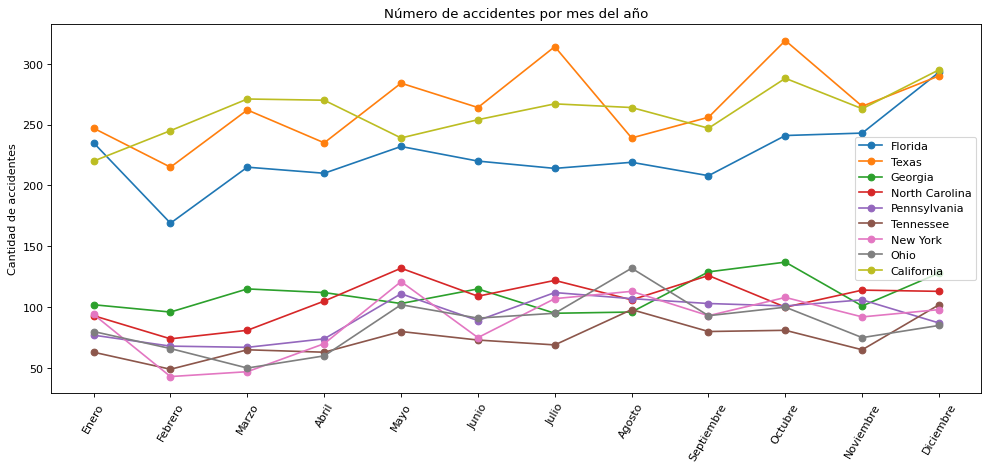

In [162]:
figure(figsize=(15, 6), dpi=80)
for estado in estados_interes:
    plt.plot(nombre_meses,df_filtrado[estado],'o-', label = estado)
    plt.ylabel('Cantidad de accidentes')
    plt.title('Número de accidentes por mes del año')
    plt.xticks(rotation=60)
    plt.legend()



### Pregunta 4: Realizar un análisis según la hora del dia

Se exploran los datos de la columna 'hour_of_crash'

In [47]:
df1['hour_of_crash']

0        14
1        11
2        12
3        16
4        18
         ..
32533    14
32534    22
32535     6
32536     7
32537    13
Name: hour_of_crash, Length: 32538, dtype: Int64

In [48]:
df1['hour_of_crash'].describe()

count      32538.0
mean     13.450181
std      10.173214
min            0.0
25%            7.0
50%           14.0
75%           19.0
max           99.0
Name: hour_of_crash, dtype: Float64

In [49]:
df1[ df1['hour_of_crash'] == 99]

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,contador
210,41,Oregon,410312,1,1,0,0,0,1,1,...,0,None,0,None,0,None,1,1,2015-11-14 00:00:00+00:00,1
211,26,Michigan,260865,1,1,0,0,0,1,1,...,0,None,0,None,0,None,1,1,2015-12-24 00:00:00+00:00,1
231,22,Louisiana,220726,1,1,0,0,0,2,2,...,18,Date of Crash and Date of EMS Notification Wer...,0,None,0,None,1,0,2015-04-02 00:00:00+00:00,1
336,41,Oregon,410410,1,1,0,0,0,1,1,...,0,None,0,None,0,None,1,1,2015-12-16 00:00:00+00:00,1
337,41,Oregon,410373,1,1,0,0,0,1,1,...,0,None,0,None,0,None,1,1,2015-05-04 00:00:00+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30376,4,Arizona,40745,2,2,0,0,0,3,3,...,0,None,0,None,0,None,1,0,2015-11-02 00:00:00+00:00,1
30391,4,Arizona,40616,2,2,0,0,0,3,3,...,0,None,0,None,0,None,1,0,2015-04-22 00:00:00+00:00,1
30601,25,Massachusetts,250108,3,3,0,0,0,3,3,...,0,None,0,None,0,None,1,0,2015-06-15 00:00:00+00:00,1
31139,42,Pennsylvania,420563,3,3,0,0,0,5,5,...,0,None,0,None,0,None,1,0,2015-04-19 00:00:00+00:00,1


Se logra notar que las filas que tienen el valor '99' en la columna 'hour_of_crash', son aquellos que no tienen especificada la hora a la cual se registró el accidente.

In [50]:
hora = [x for x in range(24)]
hora

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [153]:
estados_interes

['Florida',
 'Texas',
 'Georgia',
 'North Carolina',
 'Pennsylvania',
 'Tennessee',
 'New York',
 'Ohio',
 'California']

In [166]:
df3 = df1.groupby(['state_name', 'hour_of_crash']).size().reset_index(name = 'contador')
df_pivot2 = df3.pivot(index='hour_of_crash', columns='state_name', values='contador')
df_pivot2

state_name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
hour_of_crash,,,,,,,,,,,,,,,,,,,,,
0,30.0,5.0,21.0,20.0,129.0,16.0,16.0,8.0,NaN,115.0,...,2.0,33.0,149.0,7.0,1.0,25.0,19.0,9.0,23.0,5.0
1,27.0,3.0,33.0,15.0,121.0,30.0,15.0,11.0,2.0,103.0,...,4.0,27.0,159.0,5.0,NaN,32.0,22.0,7.0,20.0,NaN
2,30.0,2.0,24.0,12.0,136.0,17.0,12.0,7.0,1.0,105.0,...,3.0,22.0,179.0,5.0,2.0,34.0,15.0,7.0,20.0,3.0
3,22.0,NaN,18.0,8.0,94.0,6.0,9.0,3.0,2.0,97.0,...,2.0,26.0,89.0,7.0,NaN,21.0,11.0,12.0,13.0,6.0
4,24.0,2.0,18.0,13.0,93.0,8.0,7.0,4.0,NaN,73.0,...,3.0,16.0,89.0,5.0,NaN,12.0,8.0,9.0,8.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,47.0,3.0,54.0,28.0,208.0,33.0,10.0,8.0,2.0,201.0,...,7.0,51.0,179.0,10.0,3.0,34.0,20.0,17.0,24.0,6.0
21,42.0,6.0,37.0,22.0,187.0,21.0,13.0,8.0,1.0,180.0,...,1.0,41.0,196.0,14.0,2.0,41.0,19.0,8.0,23.0,4.0
22,34.0,1.0,42.0,17.0,159.0,16.0,18.0,9.0,1.0,156.0,...,NaN,46.0,164.0,9.0,2.0,36.0,17.0,5.0,22.0,7.0


In [194]:
df_filtrado2 = df_pivot2.loc[:, estados_interes]
df_filtrado2

state_name,Florida,Texas,Georgia,North Carolina,Pennsylvania,Tennessee,New York,Ohio,California
hour_of_crash,,,,,,,,,
0,115.0,149.0,51.0,44.0,36.0,33.0,40.0,42.0,129.0
1,103.0,159.0,42.0,45.0,35.0,27.0,42.0,31.0,121.0
2,105.0,179.0,41.0,40.0,48.0,22.0,27.0,44.0,136.0
3,97.0,89.0,39.0,39.0,38.0,26.0,30.0,40.0,94.0
4,73.0,89.0,31.0,22.0,20.0,16.0,23.0,23.0,93.0
...,...,...,...,...,...,...,...,...,...
20,201.0,179.0,63.0,67.0,67.0,51.0,52.0,52.0,208.0
21,180.0,196.0,86.0,78.0,56.0,41.0,57.0,58.0,187.0
22,156.0,164.0,64.0,48.0,60.0,46.0,47.0,45.0,159.0


In [195]:
df_filtrado2.drop(99, inplace=True)
df_filtrado2


state_name,Florida,Texas,Georgia,North Carolina,Pennsylvania,Tennessee,New York,Ohio,California
hour_of_crash,,,,,,,,,
0,115.0,149.0,51.0,44.0,36.0,33.0,40.0,42.0,129.0
1,103.0,159.0,42.0,45.0,35.0,27.0,42.0,31.0,121.0
2,105.0,179.0,41.0,40.0,48.0,22.0,27.0,44.0,136.0
3,97.0,89.0,39.0,39.0,38.0,26.0,30.0,40.0,94.0
4,73.0,89.0,31.0,22.0,20.0,16.0,23.0,23.0,93.0
...,...,...,...,...,...,...,...,...,...
19,167.0,166.0,81.0,81.0,59.0,35.0,68.0,45.0,171.0
20,201.0,179.0,63.0,67.0,67.0,51.0,52.0,52.0,208.0
21,180.0,196.0,86.0,78.0,56.0,41.0,57.0,58.0,187.0


In [196]:
if df_filtrado2.isna().any().any():
    print("Hay datos faltantes en el dataframe")
else:
    print("No hay datos faltantes en el dataframe")


No hay datos faltantes en el dataframe


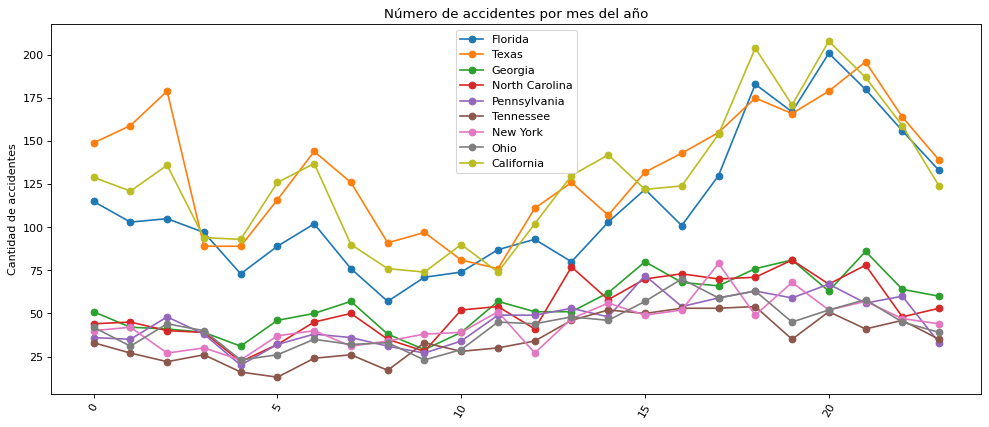

In [200]:
figure(figsize=(15, 6), dpi=80)

horas = [x for x in range(24)]

for estado in estados_interes:
    plt.plot(horas,df_filtrado2[estado],'o-', label = estado)
    plt.ylabel('Cantidad de accidentes')
    plt.title('Número de accidentes por mes del año')
    plt.xticks(rotation=60)
    plt.legend()
